In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.metrics import mean_squared_error

In [145]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
x, y = diabetes.data, diabetes.target
y = y.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

def compute_gram_matrix(X, kernel='rbf', **kwargs):
    return pairwise_kernels(X, metric=kernel, **kwargs)

K = compute_gram_matrix(x_train, kernel='rbf', gamma=0.1)
K = y_train@y_train.T@K
pca = PCA(n_components=10)
X_kpca = pca.fit_transform(K)

model = LinearRegression()
model.fit(X_kpca, y_train)

K = compute_gram_matrix(x_test, kernel='sigmoid', gamma=0.1)
K = y_test@y_test.T@K
X_new = pca.transform(K)
y_pred = model.predict(X_new)

print(mean_squared_error(y_test, y_pred))

0.049566030643807726


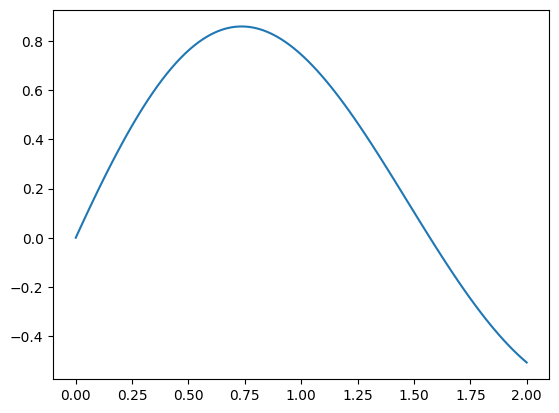

In [126]:
x = np.linspace(0, 2, 100)
y = np.sin(2*x)/np.exp(x/5)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
plt.plot(x, y)
plt.show()

In [135]:
def compute_gram_matrix(X, kernel='rbf', **kwargs):
    return pairwise_kernels(X, metric=kernel, **kwargs)

K = compute_gram_matrix(x, kernel='rbf', gamma=0.1)
K = y@y.T@K
pca = PCA(n_components=5)
X_kpca = pca.fit_transform(K)

model = LinearRegression()
model.fit(X_kpca, y)

y_pred = model.predict(X_kpca)

print(mean_squared_error(y, y_pred))

model = LinearRegression()
model.fit(x, y)
y_pred2 = model.predict(x)
print(mean_squared_error(y, y_pred2))

2.8866740701169826e-27
2859.69634758675


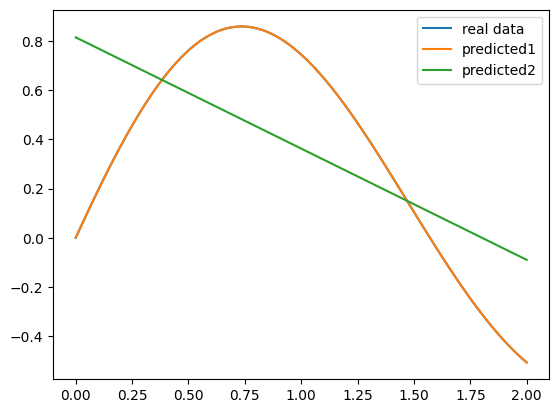

In [131]:
plt.plot(x, y, label='real data')
plt.plot(x, y_pred, label='predicted1')
plt.plot(x, y_pred2, label='predicted2')
plt.legend()
plt.show()